#Аудиториска вежба 6: Machine Learning

## <font color='pink'>Polynomial Regression<font>

Polynomials provide the best approximation of
the relationship between the dependent and
independent variables.

Therefore, a broad range of functions can be fit under it.

Polynomial Regression still uses "least squares",
but it is an "overdetermined system", meaning
that there are more equations than unknowns.

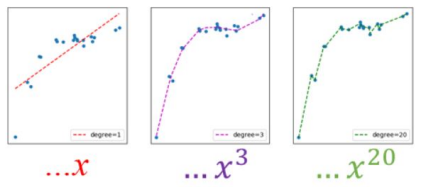

### <font color='white'>Overfitting<font>

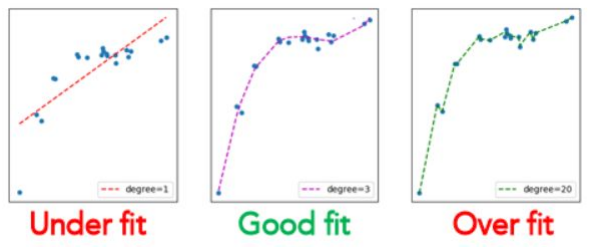

### <font color='white'>Regularization<font>

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.
The loss function is the function that computes the distance between the current output of the model and the expected output.


There are two main types of regularization techniques: Ridge Regularization and Lasso Regularization.



Ridge Regression modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.

Lasso Regularization modifies the over-fitted or under-fitted models by adding the penalty equivalent to the sum of the absolute values of coefficients. 



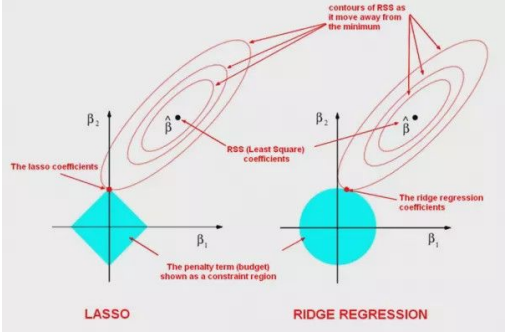

### <font color='white'>Cross Validation<font>

If the dataset is too small to be divided into train and test data we use Cross Validation.

> Leave one out (LOOCV) Cross Validation is an extreme case of K-Fold Cross Validation.

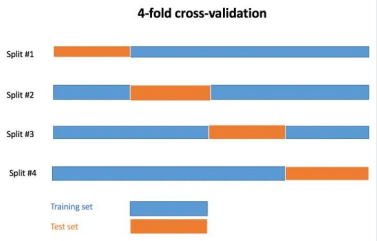

### <font color='red'>Coding Example<font>

In [ ]:
#Resource: https://www.kaggle.com/akram24/position-salaries
!gdown 1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe

Downloading...
From: https://drive.google.com/uc?id=1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe
To: /content/Position_Salaries.csv
100% 246/246 [00:00<00:00, 507kB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Position_Salaries.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


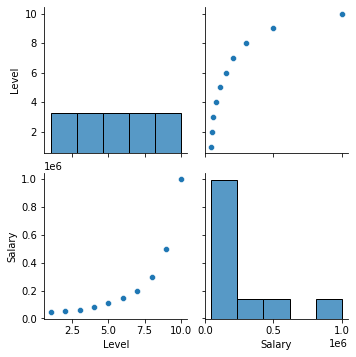

In [ ]:
import seaborn as sns

sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2:3].values

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

poly_reg = PolynomialFeatures(5)

In [ ]:
X_train

array([[-1.5666989 ],
       [ 0.17407766],
       [ 1.5666989 ],
       [ 0.87038828],
       [-0.17407766],
       [ 1.21854359],
       [-0.52223297],
       [-1.21854359]])

In [ ]:
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

X_poly_train

array([[ 1.00000000e+00, -1.56669890e+00,  2.45454545e+00,
        -3.84553367e+00,  6.02479339e+00, -9.43903720e+00],
       [ 1.00000000e+00,  1.74077656e-01,  3.03030303e-02,
         5.27508048e-03,  9.18273646e-04,  1.59850924e-04],
       [ 1.00000000e+00,  1.56669890e+00,  2.45454545e+00,
         3.84553367e+00,  6.02479339e+00,  9.43903720e+00],
       [ 1.00000000e+00,  8.70388280e-01,  7.57575758e-01,
         6.59385060e-01,  5.73921028e-01,  4.99534137e-01],
       [ 1.00000000e+00, -1.74077656e-01,  3.03030303e-02,
        -5.27508048e-03,  9.18273646e-04, -1.59850924e-04],
       [ 1.00000000e+00,  1.21854359e+00,  1.48484848e+00,
         1.80935261e+00,  2.20477502e+00,  2.68661448e+00],
       [ 1.00000000e+00, -5.22232968e-01,  2.72727273e-01,
        -1.42427173e-01,  7.43801653e-02, -3.88437745e-02],
       [ 1.00000000e+00, -1.21854359e+00,  1.48484848e+00,
        -1.80935261e+00,  2.20477502e+00, -2.68661448e+00]])

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly_train, Y_train)

LinearRegression()

Mean Squared Error (MSE) is the difference between your model's predictions and the ground truth, squared, then averaged out across the whole dataset. It is a simple loss function.

In [ ]:
y_pred = lin_reg.predict(X_poly_test)

training_r2 = r2_score(Y_train, lin_reg.predict(X_poly_train))
training_mse = mean_squared_error(Y_train, lin_reg.predict(X_poly_train))

testing_r2 = r2_score(Y_test, y_pred)
testing_mse = mean_squared_error(Y_test, y_pred)

print("r2 score for the training dataset: " + str(training_r2))
print("r2 score for the testing dataset: " + str(testing_r2))

print("  ")
print("MSE for the training dataset: " + str(training_mse))
print("MSE for the testing dataset: " +  str(testing_mse))

r2 score for the training dataset: 0.9998123991663488
r2 score for the testing dataset: 0.9956191033426078
  
MSE for the training dataset: 0.00022127311453035945
MSE for the testing dataset: 0.00026612688861544847


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

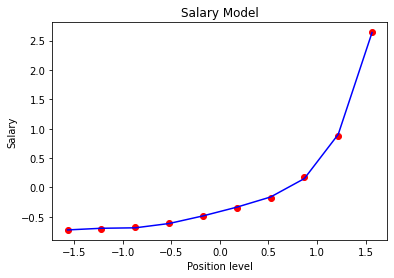

In [ ]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')

plt.title('Salary Model')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.show()

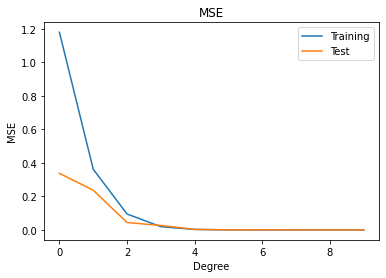

In [ ]:
train = []
test = []

for i in range(0, 10):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X_train)

    lin = LinearRegression()
    lin.fit(X_poly, Y_train)
    
    X_poly_test = poly.fit_transform(X_test)
    y_pred = lin.predict(X_poly_test)

    training_score = mean_squared_error (Y_train, lin.predict(X_poly))
    testing_score = mean_squared_error(Y_test,y_pred)

    train.append(training_score)
    test.append(testing_score)

x = np.arange(10)

plt.plot(x, train, label="Training")
plt.plot(x, test, label="Test")

plt.legend()

plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE")

plt.show()

In [ ]:
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge

cross_val = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)
model = KernelRidge(alpha=0.003, kernel='poly', degree=5, gamma=1)

scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cross_val)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

model.fit(X_train, Y_train)
y_pred = model.predict(Y_test)
print("r2 score for the testing dataset: " + str(r2_score(Y_test, y_pred)))
print("MSE for the testing dataset: " +  str(mean_squared_error(Y_test, y_pred)))

Mean MAE: 0.149 (0.156)
r2 score for the testing dataset: 0.2100574109585489
MSE for the testing dataset: 0.04798674331924921


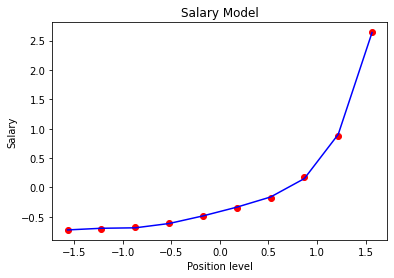

In [ ]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')

plt.title('Salary Model')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.show()

## <font color='orange'>Decision Trees<font>

Decision trees split the data into subcategories
which we use to predict some output variable.

Decision trees are easy to interpret and
visualize.

They can easily capture non-linear patterns.

They require fewer data preprocessing from the
user, for example, there is no need to normalize
columns.

### <font color='white'>Decision Tree Classification<font>

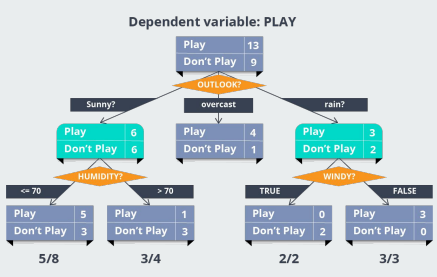

### <font color='white'>Decision Tree Regression<font>

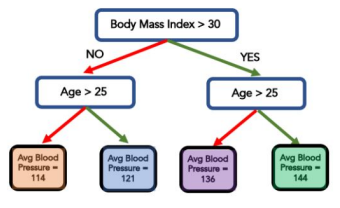

### <font color='white'>Evaluation metrics<font>

#### <font color='white'>Entropy<font>

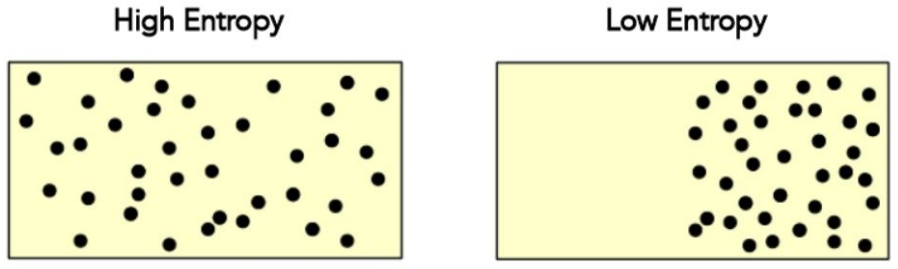

#### <font color='white'>Gini Index<font>

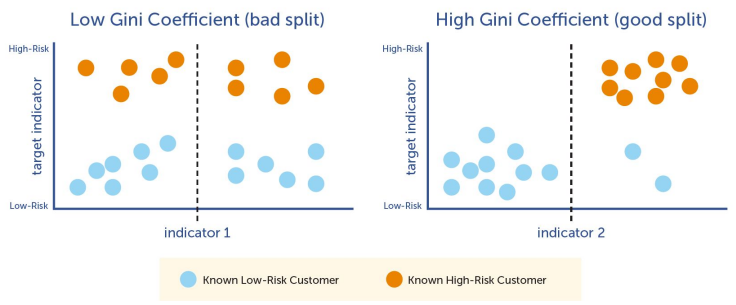

#### <font color='white'>Stop Condition<font>

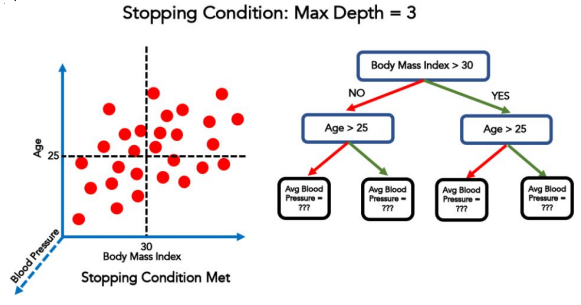

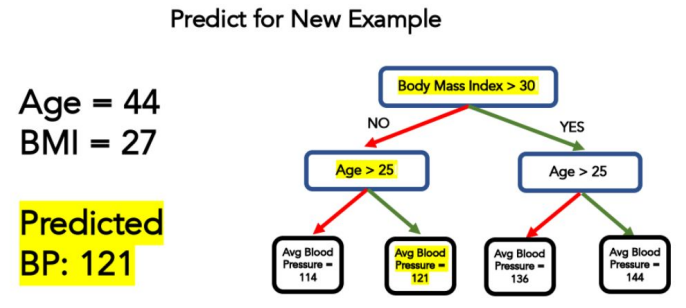

### <font color='red'>Coding Example<font>

#### <font color='white'>Classification<font>

In [ ]:
#Resource: https://www.kaggle.com/raghupalem/bill_authentication
!gdown 1eheisonKu8xCOSuqXu34elnt6rTOhXh5

Downloading...
From: https://drive.google.com/uc?id=1eheisonKu8xCOSuqXu34elnt6rTOhXh5
To: /content/bill_authentication.csv
100% 46.4k/46.4k [00:00<00:00, 58.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('bill_authentication.csv')

In [ ]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


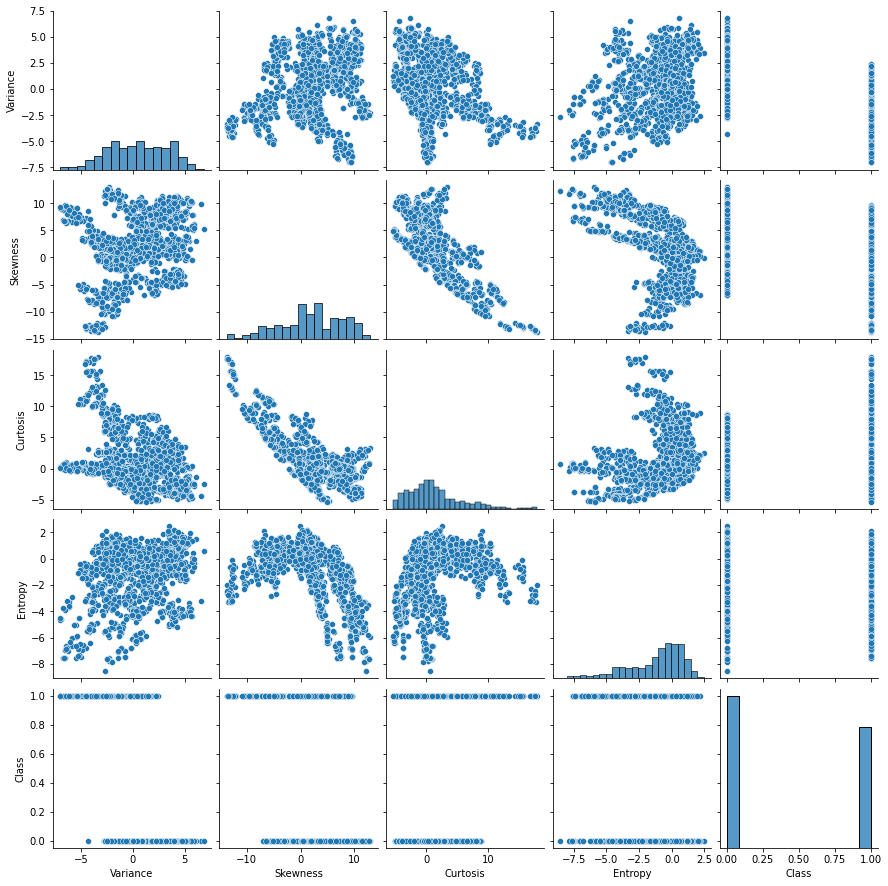

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9018181818181819


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[149  10]
 [ 17  99]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       159
           1       0.91      0.85      0.88       116

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275



In [ ]:
!pip install graphviz
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


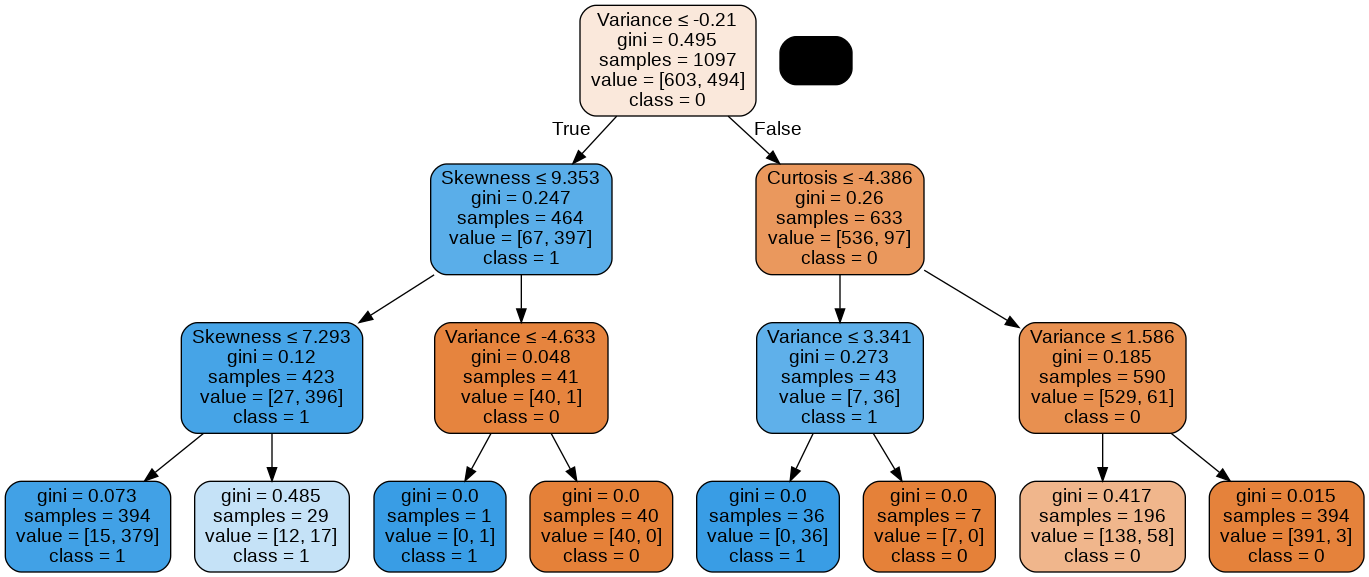

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = data.columns[:-1],class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Note: We can optimize the performance using the entropy as criteria.
classifier_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

classifier_opt = classifier_opt.fit(X_train,Y_train)
y_pred = classifier_opt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9454545454545454


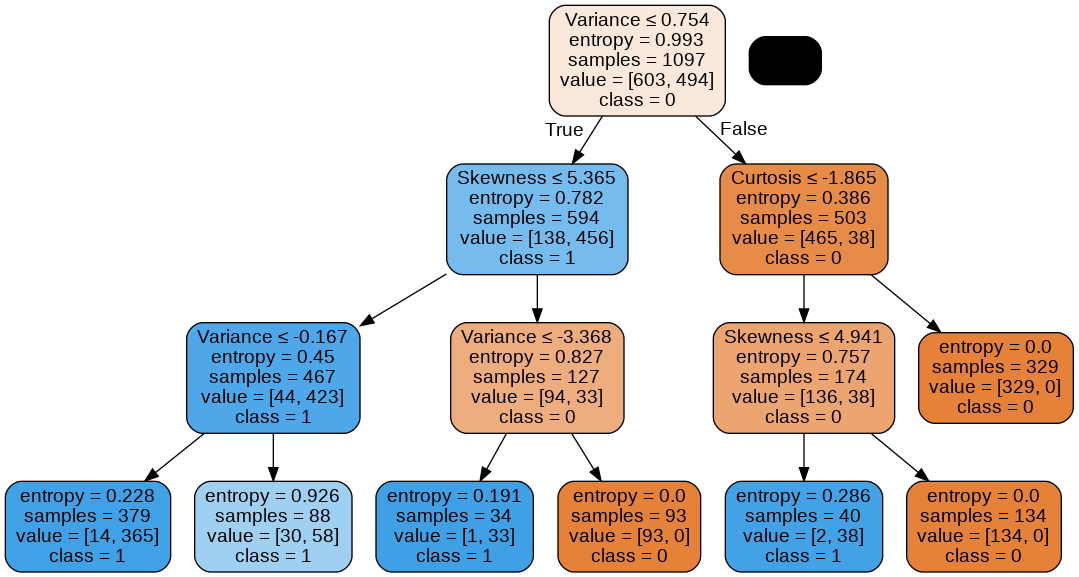

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(classifier_opt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

#### <font color='white'>Regression<font>

In [ ]:
#Note: For this example we use two datasets.
#Resource: https://www.kaggle.com/datasets/akram24/position-salaries 
#Resource: https://www.kaggle.com/datasets/farhanmd29/50-startups

!gdown 1z611SxFGAJaIKH4nAqKhFy2uKNNZw6tn
!gdown 1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe

Downloading...
From: https://drive.google.com/uc?id=1z611SxFGAJaIKH4nAqKhFy2uKNNZw6tn
To: /content/50_Startups.csv
100% 2.44k/2.44k [00:00<00:00, 6.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe
To: /content/Position_Salaries.csv
100% 246/246 [00:00<00:00, 642kB/s]


In [ ]:
pos_salaries = pd.read_csv('Position_Salaries.csv')

In [ ]:
pos_salaries.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


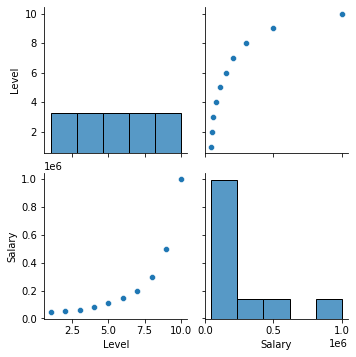

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(pos_salaries)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pos_salaries[pos_salaries.columns[1:-1]],  pos_salaries['Salary'], test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [ ]:
print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: 0.3208163265306122


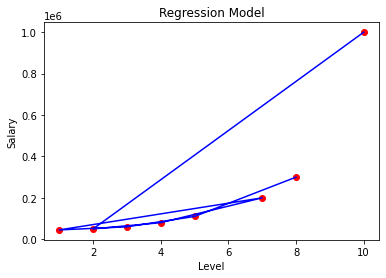

In [ ]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


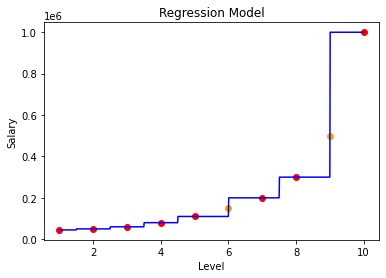

In [ ]:
#Note: We can use another visualization.
X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'orange')

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()

In [ ]:
startups = pd.read_csv('50_Startups.csv')

In [ ]:
startups.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [ ]:
#Note: We can only visualize up to 3 dimensions.
startups = startups.drop(columns=['State','Administration']) 

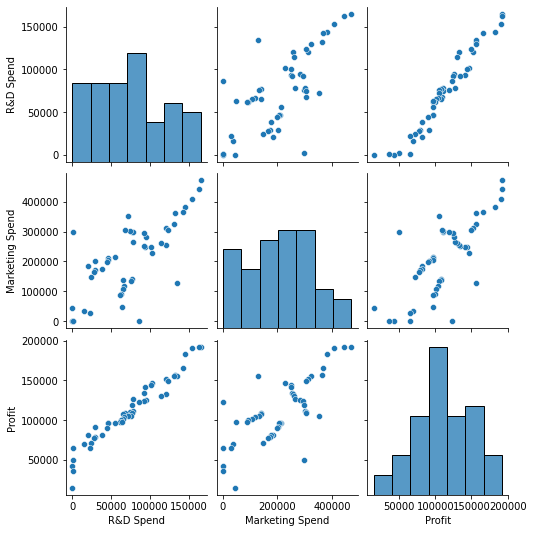

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(startups)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(startups[startups.columns[:-1]],  startups['Profit'], test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, Y_train)

y_pred2 = regressor2.predict(X_test)

In [ ]:
print("Accuracy:",regressor2.score(X_test, Y_test))

Accuracy: 0.7786713833882082


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


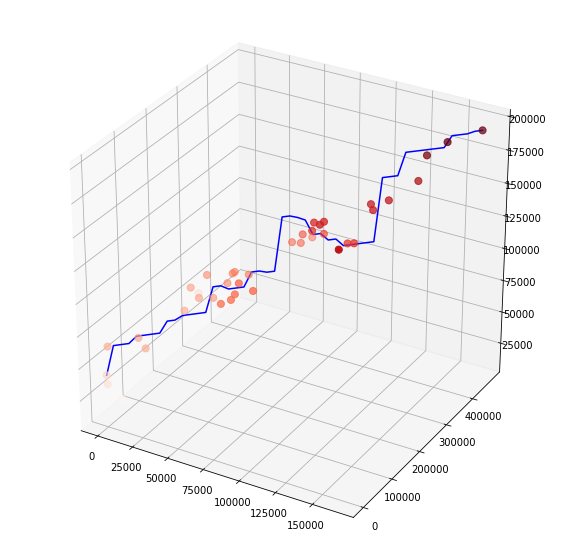

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

zdata = Y_train
xdata = X_train.iloc[:, 0]
ydata = X_train.iloc[:, 1]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s=50);

xline = np.linspace(min(xdata), max(xdata), 50)
yline = np.linspace(min(ydata), max(ydata), 50)

z = np.concatenate((xline.reshape(-1,1),yline.reshape(-1,1)), axis = 1)
zline = regressor2.predict(z)

ax.plot3D(xline, yline, zline, 'blue')